# k-Nearest Neigbours (kNN)

## kNN Classification

### 1. Preparation

1.1 Import the needed libraries

In [237]:
import sklearn.datasets
import sklearn.model_selection
import sklearn.neighbors as sn
import sklearn.metrics as skm
import pandas as pd
import numpy as np

1.2 Get the Iris Dataset. Structure of the dataset:
```
{
    {data}
    {target}
    {frame}
}
```

In [238]:
iris_data = sklearn.datasets.load_iris(as_frame=True)

1.3.1 Create the "target_num2name" dictionary, to be able to translate the id to the actual name for data visualization purposes. Example:
```
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
```

1.3.2 Store the table row named "feature_names" into the feature_names variable, for easier access. Example:
```
['sepal length (cm)', 'sepal width (cm)', …]
```

In [239]:
target_num2name = {ix: str(name) for ix, name in enumerate(iris_data['target_names'])}
feature_names = iris_data['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

1.4.1) get the 'frame' dictionary from the dataset into a variable (easier access; no deepcopy (!!!))

1.4.2) add the column 'named_target' to the frame and put in the mapped target names from the taget IDs

1.4.3) Display the first X elements

In [240]:
iris_df = iris_data['frame']
iris_df['named_target'] = iris_df['target'].map(target_num2name)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,named_target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


1.5.1) split the dataset into two parts: train & test - the size of the two subsets is random, but usually with a ratio of round about 75% to 25% - ensures, the model generalizes well

1.5.2) shows the dimensions of the datasets with the pattern: (rows, columns)

In [241]:
train, test = sklearn.model_selection.train_test_split(iris_df)
train.shape, test.shape

((112, 6), (38, 6))

### 2. Training

2.1.1) knn ≈ k nearest neighbours (our model)

2.1.2) Train the model using the feature names (X; 1.3.2) and the corresponding target values (y; 1.4.2)

In [242]:
# n_neighbours is {k}
knn = sn.KNeighborsClassifier(n_neighbors=1)
knn.fit(X = train[feature_names], y=train['named_target'])

KNeighborsClassifier(n_neighbors=1)

2.2) use the trained model on the test-dataset (1.5.2) using only the feature_names (1.3.2) to predict the class of each sample

In [243]:
test_pred = knn.predict(test[feature_names])

2.3) compares the predicted classes (2.2) to the targets of the test-dataset (1.5.2)

In [244]:
skm.accuracy_score(
    y_true = test['named_target'], 
    y_pred = test_pred
)

0.9473684210526315

2.4.1) creates the confusion matrix

2.4.2) display the confusion matrix using the values of the target_num2name dictionary as labels

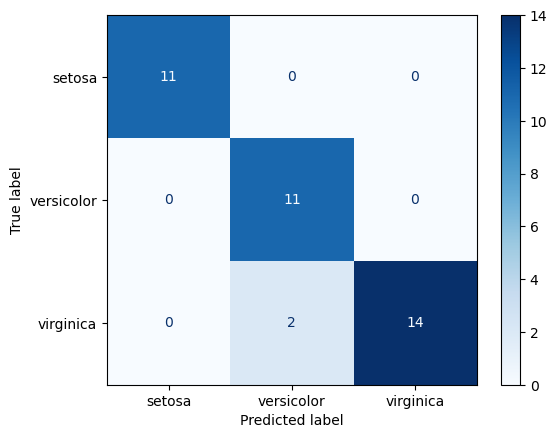

In [245]:
# Create the confusion matrix
cm = skm.confusion_matrix(test['named_target'], test_pred)

# Display it
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_num2name.values())
disp.plot(cmap='Blues')

In [246]:
print(skm.classification_report(y_true=test['named_target'], y_pred=test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



#### Aufgabe 

- Evaluieren Sie den `skm.accuracy_score` für das `test` und `trainings`-Set für verschiedene Werte von k $\in [1, 2, 5, 10, 20, 40]$
- Speichern Sie die Ergebnisse in 2 dictionaries `score_train` und `score_test` die ein Mapping von dem Wert `k` zu der `score` erhalten

In [247]:
k_values = [1,2,5,10,20,40]
score_train = {}
score_test = {}
results = {}

for k in k_values:
    #create and train model
    model = sn.KNeighborsClassifier(n_neighbors=k)
    model.fit(X=train[feature_names], y=train['named_target'])
    # predict
    test_pred = model.predict(test[feature_names])
    train_pred = model.predict(train[feature_names])
    # calc accuracy
    score_test[k] = skm.accuracy_score( y_true = test['named_target'], y_pred = test_pred)
    score_train[k] = skm.accuracy_score(y_true = train['named_target'], y_pred = train_pred)
    results[k]= {"test": score_test[k], "train": score_train[k]}

result = pd.DataFrame.from_dict(results, orient='index')
result.head(k_values.__len__())

,test,train
1,0.947368,1.000000
2,0.947368,0.973214
5,0.947368,0.982143
10,0.973684,0.982143
20,0.973684,0.973214
40,0.894737,0.928571


### Conclusion
The accuracy is volatile. It depends on how the samples got distributet while shuffling the original dataset before the split into the training and test datasets.

## kNN - Regression

In [248]:
train, test = sklearn.model_selection.train_test_split(iris_df, random_state=23)

#### Aufgabe

- Nutzen Sie den `sn.KNeighborsRegressor` umd das Target `petal width` auf Basis des Feature `petal length` vorherzuagen
  - Evaluieren Sie den `skm.mean_absolute_error` für Werte von k $\in [1, 5, 10, 20, 40, 75]$
- Führen Sie auch eine Regression auf das Target `petal width` auf Basis der 3 Feature `petal length`, `sepal width`, `sepal length` durch

In [262]:
k_values = [1,5,10,20,40,75]
target = 'petal width (cm)'
feature_names = {
    'param_count_1': ['petal length (cm)'],
    'param_count_3': ['sepal width (cm)', 'petal length (cm)', 'sepal width (cm)']
}
mae = {}

for k in k_values:
    mae[k] = {}
    for n in feature_names:
        # create and train model
        model = sn.KNeighborsRegressor(n_neighbors=k)
        model.fit(X = train[feature_names[n]], y = train[target])
        pred = model.predict(test[feature_names[n]])
        mae[k][n] = skm.mean_absolute_error(test[target], pred)

Data as table

In [263]:
vis1 = pd.DataFrame.from_dict(mae, orient='index')
vis1.head(k_values.__len__())

,param_count_1,param_count_3
1,0.189474,0.210526
5,0.150526,0.141579
10,0.141579,0.131053
20,0.139079,0.141974
40,0.166250,0.180461
75,0.432035,0.439053


Data as (line-)graph

Text(0.5, 1.0, 'MAE to k')

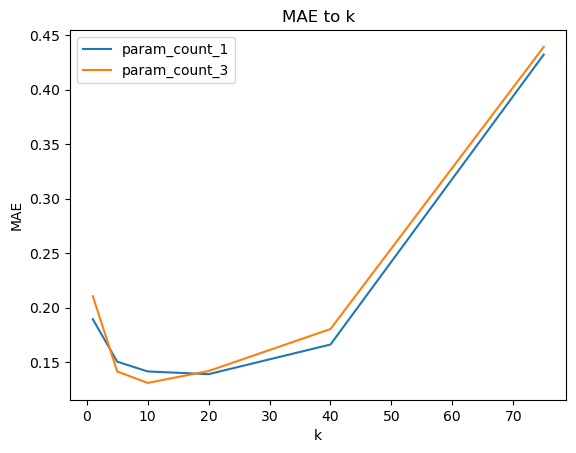

In [264]:
vis2 = pd.DataFrame.from_dict(mae, orient='index').plot(kind='line')
vis2.set_xlabel('k')
vis2.set_ylabel('MAE')
vis2.set_title('MAE to k')